# Trabajo práctico PP3 (Análisis exploratorio de datos)

## Dataset:

Vamos a trabajar con un dataset de una tienda en línea. A continuación vamos a importar librerías para poder comenzar a trabajar con él.

#### Cargamos la ruta

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Cargar el dataset
df_hoja_uno = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2010')
df_hoja_dos = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')

# Unir los dos DataFrames
df = pd.concat([df_hoja_uno, df_hoja_dos], ignore_index=True)

FileNotFoundError: [Errno 2] No such file or directory: '/content/dataset_tp_mmd/online_retail_II.xlsx'

### Tipos de atributos del DataFrame

| Variable      | Tipo de Variable    | Rol en el análisis             | Detalles adicionales                                                                           |
| ------------- | ------------------- | ------------------------------ | ---------------------------------------------------------------------------------------------- |
| `Invoice`     | Categórica nominal  | Identificador / Clave primaria | Representa el número de factura. Puede repetirse por múltiples productos en una misma factura. |
| `StockCode`   | Categórica nominal  | Identificador secundario       | Código del producto vendido.                                                                   |
| `Description` | Categórica nominal  | Atributo descriptivo           | Nombre o descripción del producto. Puede contener nulos.                                       |
| `Quantity`    | Numérica discreta   | Variable de interés            | Cantidad de productos comprados. Puede indicar devoluciones si es negativa.                    |
| `InvoiceDate` | Temporal (datetime) | Variable temporal clave        | Fecha y hora de la compra. Muy útil para análisis de series temporales y frecuencia.           |
| `Price`       | Numérica continua   | Variable de interés            | Precio unitario del producto.                                                                  |
| `Customer ID` | Categórica nominal  | Identificador de cliente       | Puede contener valores nulos. Permite agrupar compras por cliente.                             |
| `Country`     | Categórica nominal  | Variable de segmentación       | País del cliente. Útil para segmentar el mercado o visualizar regiones.                        |


#### DataFrame

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


Como la columna "Customer ID" es de tipo flotante, la pasamos a string para que al usar el método describe nos devuelva datos más significativos.

In [ ]:
df['Customer ID'] = df['Customer ID'].astype(str)

Configuramos pandas para que nos de los valores numéricos en formato con dos decimales (en vez de notación científica) para simplificar la lectura.

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
df.describe(include=[object])

,Invoice,StockCode,Description,Customer ID,Country
count,1067371,1067371,1062989,1067371,1067371
unique,53628,5305,5698,5943,43
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,nan,United Kingdom
freq,1350,5829,5918,243007,981330


Si hay 53628 valores únicos de códigos de facturas, ¿por qué el valor más comun es 537434? ¿Las facturas no deberían ir de 1 a 53628?

Pasando la columna 'Invoice' a int y aplicándole describe nos damos cuenta de que hay nombres de las facturas que contienen letras.

In [ ]:
df['Invoice'] = df['Invoice'].astype(str)

In [ ]:
def contar_letras(x):
  return sum(c.isalpha() for c in x)

invoice_agrup_cant_lets = df['Invoice'].groupby(df['Invoice'].map(contar_letras))
print(invoice_agrup_cant_lets.size())

Invoice
0    1047871
1      19500
Name: Invoice, dtype: int64


Ahora podemos ver si hay números repetidos sin contar las letras.

In [ ]:
def eliminar_letras(texto):
  return ''.join([c for c in texto if not c.isalpha()])

copia_invoice = df['Invoice'].copy()

for i in range(len(copia_invoice)):
  copia_invoice[i] = eliminar_letras(copia_invoice[i])

print(f"La cantidad de valores únicos de la columna invoice original es: {df['Invoice'].nunique()}")
print(f"La cantidad de valores únicos de la columna invoice sin letras es: {copia_invoice.nunique()}")

La cantidad de valores únicos de la columna invoice original es: 53628
La cantidad de valores únicos de la columna invoice sin letras es: 53628


También podemos ver qué letras o combinaciones de letras están en los valores de "Invoice" (estamos tratando de ver si estás letras tienen algún significado).

In [ ]:
def eliminar_numeros(texto):
  return ''.join([c for c in texto if not c.isdigit()])

df['InvoiceLetters'] = df['Invoice'].copy()

for i in range(len(df['InvoiceLetters'])):
  df.loc[i, 'InvoiceLetters'] = eliminar_numeros(df['InvoiceLetters'][i])

print(f"Los valores únicos de las letras de la columna 'Invoice' son los siguientes: {df['InvoiceLetters'].unique()}")

Los valores únicos de las letras de la columna 'Invoice' son los siguientes: ['' 'C' 'A']


In [ ]:
df.groupby('InvoiceLetters').size()

,0
InvoiceLetters,
,1047871
A,6
C,19494


Como solo son 6 veamos las filas con invoice 'A'

In [ ]:
df[df['InvoiceLetters'] == 'A']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceLetters
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,nan,United Kingdom,A
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,nan,United Kingdom,A
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,nan,United Kingdom,A
825443,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,nan,United Kingdom,A
825444,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,nan,United Kingdom,A
825445,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,nan,United Kingdom,A


Vemos que todas las filas con el prefijo "A" en "Invoice" son de devoluciones.

In [ ]:
len(df[df['Description'] == "Adjust bad debt"])

6

Vamos a eliminar estas filas del df.

In [ ]:

print(f"La cantidad de filas antes de eliminar esas 6 es {len(df)}")

df = df[df['Description'] != "Adjust bad debt"]

print(f"La cantidad de filas después de eliminar esas 6 es {len(df)}")

La cantidad de filas antes de eliminar esas 6 es 1067371
La cantidad de filas después de eliminar esas 6 es 1067365


Ahora analizemos las filas con el valor "C" en la columna "InvoiceLetters".

In [ ]:
df[df['InvoiceLetters'] == 'C'].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceLetters
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,C
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,C
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,C
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,C
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,C


Notamos que en este caso hay valores negativos en la columna "Quantity", podemos interpretar esto como una cancelación.

In [ ]:
cant_canc_df = len(df[df['Quantity'] < 0])
cant_df_c = len(df[df['InvoiceLetters'] == 'C'])
cant_canc_df_c = len(df[(df['Quantity'] < 0) & (df['InvoiceLetters'] == 'C')])

print(f"Hay {cant_canc_df} valores negativos en la columna 'Quantity' de todo el dataset")
print(f"Hay {cant_df_c} valores en la columna 'Quantity' con el prefijo 'C'")
print(f"Hay {cant_canc_df_c} valores negativos en la columna 'Quantity' de las facturas con el prefijo 'C'")

Hay 22950 valores negativos en la columna 'Quantity' de todo el dataset
Hay 19494 valores en la columna 'Quantity' con el prefijo 'C'
Hay 19493 valores negativos en la columna 'Quantity' de las facturas con el prefijo 'C'


Veamos la fila con el valor de la columna 'InvoiceLetters' con el prefijo 'C' pero sin un valor negativo en la columna 'Quantity'.

In [ ]:
fila_c_sin_neg = df[(df['InvoiceLetters'] == 'C') & (df['Quantity'] >= 0)]
fila_c_sin_neg

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceLetters
76799,C496350,M,Manual,1,2010-02-01 08:24:00,373.57,nan,United Kingdom,C


Podemos dejarla en el df debido a que la única característica que nos hace pensar que es una cancelación es el prefijo 'C' en el valor de la columna 'Invoice'. Pero eliminemos las demás.

In [ ]:
df = df[(df['InvoiceLetters'] != 'C') | ((df['InvoiceLetters'] == 'C') & (df['Quantity'] == 1))]

df = df.reset_index(drop=True)

cant_df_c_2 = len(df[df['InvoiceLetters'] == 'C'])

print(f"Deberia quedar 1 fila con valor 'C' en la columna 'InvoiceLetters' y en efecto queda {cant_df_c_2}.")

Deberia quedar 1 fila con valor 'C' en la columna 'InvoiceLetters' y en efecto queda 1.


Ahora veamos el resto de columnas con el valor de la columna 'Quantity' negativo.

In [ ]:
df_quant_neg = df[df['Quantity'] < 0]

print(f"Hay {len(df_quant_neg)} columnas con el valor de la columna 'Quantity' negativo.")

df_quant_neg.head()

Hay 3457 columnas con el valor de la columna 'Quantity' negativo.


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceLetters
241,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,nan,United Kingdom,
261,489463,71477,short,-240,2009-12-01 10:52:00,0.00,nan,United Kingdom,
262,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,nan,United Kingdom,
441,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,nan,United Kingdom,
3004,489655,20683,NaN,-44,2009-12-01 17:26:00,0.00,nan,United Kingdom,


Notamos que los primeros cinco valores de la columna 'Price' son 0.00, lo que no tiene sentido a simple vista. También notamos que la descripción de la fila con 'StockCode' 21733 es '85123a mixed' y que la descripción de la fila con 'StockCode' 85123A es "21733" mixed. También notamos que hay un valor de StockCode que incluye una letra, así que investiguemos un poco más.

In [ ]:
len(df[(df['Price'] == 0) & (df['Quantity'] < 0)])

3457

Eliminamos los valores con 'Quantity' menor a 0 debido a que como en esas filas el precio es siempre de 0 no nos aportan tanto valor.

In [ ]:
df = df[df['Quantity'] > 0]

filas_quantity_0 = df[df['Quantity'] == 0]

print(f"Hay {len(filas_quantity_0)} filas con el valor de la columna 'Quantity' igual a 0.")

Hay 0 filas con el valor de la columna 'Quantity' igual a 0.


In [ ]:
print(f"El dataframe tiene {len(df)} filas")

valores_unicos_stockcode_ = df['StockCode'].nunique()

print(f"El dataframe tiene {valores_unicos_stockcode_} valores únicos en la columna 'StockCode'")

# Apply the function directly to the 'StockCode' Series
df['StockCodeNumbers'] = df['StockCode'].astype(str).apply(eliminar_letras)

print(f"El dataframe tiene {df['StockCodeNumbers'].nunique()} valores únicos en la columna 'StockCodeNumbers'")

# Apply the function directly to the 'StockCode' Series
df['StockCodeLetters'] = df['StockCode'].astype(str).apply(eliminar_numeros)

df.groupby('StockCodeLetters').size()

El dataframe tiene 1044415 filas
El dataframe tiene 4984 valores únicos en la columna 'StockCode'
El dataframe tiene 4011 valores únicos en la columna 'StockCodeNumbers'


,0
StockCodeLetters,
,914051
A,30707
ADJUST,39
AMAZONFEE,4
B,34903
BANK CHARGES,35
BL,911
C,15650
D,9141


In [ ]:
df_dos_o_mas_reps_stockcodenumbers = df_filtrado = df[df.duplicated('StockCodeNumbers', keep=False)]

df_dos_o_mas_reps_stockcodenumbers.groupby('StockCodeNumbers').size().sort_values(ascending=False)

,0
StockCodeNumbers,
85099,8006
85123,5794
,4337
85049,4300
84997,4127
22423,4065
47566,3647
21212,3290
20725,3179


In [ ]:
df[df['StockCodeNumbers'] == '85099'].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceLetters,StockCodeNumbers,StockCodeLetters
161,489446,85099B,JUMBO BAG RED WHITE SPOTTY,20,2009-12-01 10:06:00,1.95,13758.0,United Kingdom,,85099,B
294,489505,85099B,JUMBO BAG RED WHITE SPOTTY,10,2009-12-01 11:17:00,1.95,15712.0,United Kingdom,,85099,B
795,489536,85099B,JUMBO BAG RED WHITE SPOTTY,5,2009-12-01 12:13:00,1.95,16393.0,United Kingdom,,85099,B
984,489547,85099B,JUMBO BAG RED WHITE SPOTTY,10,2009-12-01 12:30:00,1.95,13599.0,United Kingdom,,85099,B
985,489547,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2009-12-01 12:30:00,1.95,13599.0,United Kingdom,,85099,C


Observamos que el valor de la columna 'StockCodeNumbers' sirve para determinar una serie de productos similares con un valor de StockCodeLetter diferente.

In [ ]:
df[df["StockCodeNumbers"] == "85099"].groupby("StockCodeLetters").size()

,0
StockCodeLetters,
B,4129
C,1926
F,1889
b,25
c,10
f,27


Vemos que los valores de StockCodeLetters para las filas con este valor de StockCodeNumber no empiezan en "A" o "a". También notamos que hay tanto letras mayúsculas como minúsculas.

In [ ]:
print(df[(df["StockCodeNumbers"] == "85099") & (df["StockCodeLetters"] == "B")].head())
print(df[(df["StockCodeNumbers"] == "85099") & (df["StockCodeLetters"] == "b")].head())
print(df[(df["StockCodeNumbers"] == "85099") & (df["StockCodeLetters"] == "C")].head())
print(df[(df["StockCodeNumbers"] == "85099") & (df["StockCodeLetters"] == "c")].head())
print(df[(df["StockCodeNumbers"] == "85099") & (df["StockCodeLetters"] == "F")].head())
print(df[(df["StockCodeNumbers"] == "85099") & (df["StockCodeLetters"] == "f")].head())

     Invoice StockCode                  Description  Quantity  \
161   489446    85099B  JUMBO BAG RED WHITE SPOTTY         20   
294   489505    85099B  JUMBO BAG RED WHITE SPOTTY         10   
795   489536    85099B  JUMBO BAG RED WHITE SPOTTY          5   
984   489547    85099B  JUMBO BAG RED WHITE SPOTTY         10   
1186  489557    85099B  JUMBO BAG RED WHITE SPOTTY         20   

             InvoiceDate  Price Customer ID         Country InvoiceLetters  \
161  2009-12-01 10:06:00   1.95     13758.0  United Kingdom                  
294  2009-12-01 11:17:00   1.95     15712.0  United Kingdom                  
795  2009-12-01 12:13:00   1.95     16393.0  United Kingdom                  
984  2009-12-01 12:30:00   1.95     13599.0  United Kingdom                  
1186 2009-12-01 12:52:00   1.95     12490.0          France                  

     StockCodeNumbers StockCodeLetters  
161             85099                B  
294             85099                B  
795             8

Notamos que las letras 'B' y 'b' refieren a diferentes productos. No obstante, la letra 'C' refiere al mismo producto que la 'c', y la 'F' hace lo mismo con 'f'. Podemos filtrar tanto por StockCodeNumbers para saber las ventas de un producto sin tener en cuenta qué versión es (por ejemplo puede cambiar el color) como por Description que diferencia entre productos independientemente de que versión sea (por ejemplo no distingue entre productos similares pero de diferente color). Ahora exploremos la variable StockCodeLetters en más profundidad.

In [ ]:
prueba = df.groupby('StockCodeLetters').size().sort_values(ascending=True)

for i in range(len(prueba)):
  df_filt_stockcode_letters = df[df['StockCodeLetters'] == prueba.index[i - 1]]
  print(df_filt_stockcode_letters.head(1))
  print("-" * 80)

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   

          InvoiceDate  Price Customer ID         Country InvoiceLetters  \
0 2009-12-01 07:45:00   6.95     13085.0  United Kingdom                  

  StockCodeNumbers StockCodeLetters  
0            85048                   
--------------------------------------------------------------------------------
       Invoice StockCode                       Description  Quantity  \
255291  514532   47503J   SET/3 FLORAL GARDEN TOOLS IN BAG         1   

               InvoiceDate  Price Customer ID         Country InvoiceLetters  \
255291 2010-07-05 10:07:00  16.13         nan  United Kingdom                  

       StockCodeNumbers StockCodeLetters  
255291           47503                J   
--------------------------------------------------------------------------------
     Invoice StockCode          Description  Quantity         InvoiceDate  \
2

Hay valores en la columna 'StockCodeLetters' que nos llaman la atención, vamos a ver sus filas en más detalle.

In [ ]:
df[df['StockCodeLetters'] == 'AMAZONFEE']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceLetters,StockCodeNumbers,StockCodeLetters
431708,531411,AMAZONFEE,AMAZON FEE,1,2010-11-08 10:11:00,6706.71,nan,United Kingdom,,,AMAZONFEE
507898,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,nan,United Kingdom,,,AMAZONFEE
530092,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,nan,United Kingdom,,,AMAZONFEE
648341,547901,AMAZONFEE,AMAZON FEE,1,2011-03-28 11:57:00,219.76,nan,United Kingdom,,,AMAZONFEE


Vamos a eliminar las filas con el valor "AMAZON FEE" en la columna "Description" porque son tarifas de Amazon que suponemos que no corresponden a la venta de bienes.

In [ ]:
df = df[df['Description'] != 'AMAZON FEE']

In [ ]:
df[df['StockCodeLetters'] == 'TEST'].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceLetters,StockCodeNumbers,StockCodeLetters
27266,491725,TEST001,This is a test product.,10,2009-12-14 08:34:00,4.50,12346.0,United Kingdom,,001,TEST
27511,491742,TEST001,This is a test product.,5,2009-12-14 11:00:00,4.50,12346.0,United Kingdom,,001,TEST
27512,491744,TEST001,This is a test product.,5,2009-12-14 11:02:00,4.50,12346.0,United Kingdom,,001,TEST
38502,492718,TEST001,This is a test product.,5,2009-12-18 10:47:00,4.50,12346.0,United Kingdom,,001,TEST
38514,492722,TEST002,This is a test product.,1,2009-12-18 10:55:00,1.00,12346.0,United Kingdom,,002,TEST


Vamos a dejar esta columna en el dataset.

In [ ]:
df[df['StockCodeLetters'] == 'PADS'].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceLetters,StockCodeNumbers,StockCodeLetters
60985,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.00,16705.0,United Kingdom,,,PADS
73069,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.00,13583.0,United Kingdom,,,PADS
75993,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.00,17350.0,United Kingdom,,,PADS
78061,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.00,13408.0,United Kingdom,,,PADS
88862,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.00,13408.0,United Kingdom,,,PADS


Vemos que los precios son $0.00, esto no tiene valor como producto vendido, ya que para qué se vendería un producto sin obtener una ganancia.

In [ ]:
df_sin_price_0 = df[df['Price'] == 0]

porc_sin_price_0 = round(len(df_sin_price_0) / len(df) * 100, 2)

print(f"Al eliminar las filas con el valor de Price 0 eliminaríamos el {porc_sin_price_0}% de las filas del dataset.")

Al eliminar las filas con el valor de Price 0 eliminaríamos el 0.26% de las filas del dataset.


Como el porcentaje es bajo vamos a eliminarlas.

In [ ]:
df = df[df['Price'] != 0]

In [ ]:
df[df['StockCodeLetters'] == 'DCGSSBOY'].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceLetters,StockCodeNumbers,StockCodeLetters
239586,513099,DCGSSBOY,BOYS PARTY BAG,5,2010-06-21 15:13:00,3.36,nan,United Kingdom,,,DCGSSBOY
240934,513200,DCGSSBOY,BOYS PARTY BAG,7,2010-06-22 16:28:00,3.36,nan,United Kingdom,,,DCGSSBOY
244617,513574,DCGSSBOY,BOYS PARTY BAG,3,2010-06-25 15:13:00,3.36,nan,United Kingdom,,,DCGSSBOY
246579,513655,DCGSSBOY,BOYS PARTY BAG,4,2010-06-28 10:02:00,3.36,nan,United Kingdom,,,DCGSSBOY
272415,516470,DCGSSBOY,BOYS PARTY BAG,1,2010-07-20 15:28:00,3.36,nan,United Kingdom,,,DCGSSBOY


Podemos dejar estas filas.

In [ ]:
df[df['StockCodeLetters'] == "DCGSSGIRL"].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceLetters,StockCodeNumbers,StockCodeLetters
239587,513099,DCGSSGIRL,GIRLS PARTY BAG,3,2010-06-21 15:13:00,3.36,nan,United Kingdom,,,DCGSSGIRL
240935,513200,DCGSSGIRL,GIRLS PARTY BAG,6,2010-06-22 16:28:00,3.36,nan,United Kingdom,,,DCGSSGIRL
244618,513574,DCGSSGIRL,GIRLS PARTY BAG,1,2010-06-25 15:13:00,3.36,nan,United Kingdom,,,DCGSSGIRL
246580,513655,DCGSSGIRL,GIRLS PARTY BAG,5,2010-06-28 10:02:00,3.36,nan,United Kingdom,,,DCGSSGIRL
248604,513907,DCGSSGIRL,GIRLS PARTY BAG,1,2010-06-29 12:08:00,3.36,nan,United Kingdom,,,DCGSSGIRL


También podemos dejar estas filas.

In [ ]:
df[df['StockCodeLetters'] == "BANK CHARGES"].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceLetters,StockCodeNumbers,StockCodeLetters
18042,490948,BANK CHARGES,Bank Charges,1,2009-12-08 14:29:00,15.00,16805.0,United Kingdom,,,BANK CHARGES
92462,498269,BANK CHARGES,Bank Charges,1,2010-02-17 15:03:00,15.00,16928.0,United Kingdom,,,BANK CHARGES
144974,503497,BANK CHARGES,Bank Charges,1,2010-04-01 12:07:00,15.00,17539.0,United Kingdom,,,BANK CHARGES
150419,503960,BANK CHARGES,Bank Charges,1,2010-04-08 16:50:00,15.00,12843.0,United Kingdom,,,BANK CHARGES
164014,505204,BANK CHARGES,Bank Charges,1,2010-04-20 16:24:00,15.00,17448.0,United Kingdom,,,BANK CHARGES


Estas columnas las eliminamos porque no se corresponde a la venta de bienes (que es lo que estamos analizando).

In [ ]:
df = df[df['StockCodeLetters'] != 'BANK CHARGES']

In [ ]:
df[df['StockCodeLetters'] == "ADJUST"].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceLetters,StockCodeNumbers,StockCodeLetters
69434,495732,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:20:00,96.46,nan,EIRE,,,ADJUST
69435,495733,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:21:00,68.34,14911.0,EIRE,,,ADJUST
69436,495735,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:22:00,201.56,12745.0,EIRE,,,ADJUST
69437,495734,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:22:00,205.82,14911.0,EIRE,,,ADJUST
69438,495736,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:23:00,21.00,12606.0,Spain,,,ADJUST


Estas filas también las eliminamos porque no se corresponden a ventas de bienes.

In [ ]:
df = df[df['StockCodeLetters'] != 'ADJUST']

In [ ]:
df[df['StockCodeLetters'] == 'gift__'].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceLetters,StockCodeNumbers,StockCodeLetters
30309,491969,gift_0001_80,Dotcomgiftshop Gift Voucher £80.00,1,2009-12-14 17:57:00,69.56,nan,United Kingdom,,_0001_80,gift__
31278,491971,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,2,2009-12-14 18:37:00,17.39,nan,United Kingdom,,_0001_20,gift__
40001,492782,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2009-12-18 17:06:00,8.69,nan,United Kingdom,,_0001_10,gift__
40002,492782,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2009-12-18 17:06:00,17.39,nan,United Kingdom,,_0001_20,gift__
40360,492783,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,2009-12-18 17:15:00,43.48,nan,United Kingdom,,_0001_50,gift__


Estas filas las dejamos porque se corresponden a ventas de vouchers de regalos.

In [ ]:
df.describe(include=[np.number])

,Quantity,Price
count,1041596.00,1041596.00
mean,10.96,4.06
std,126.52,50.04
min,1.00,0.00
25%,1.00,1.25
50%,3.00,2.10
75%,10.00,4.13
max,80995.00,25111.09


In [ ]:
df.describe(include = ['datetime'])

,InvoiceDate
count,1041596
mean,2011-01-03 16:51:10.702403328
min,2009-12-01 07:45:00
25%,2010-07-12 10:46:00
50%,2010-12-07 15:33:00
75%,2011-07-24 12:18:00
max,2011-12-09 12:50:00


In [ ]:
df['TotalPrice'] = df['Quantity'] * df['Price']

In [ ]:
serie_quantity_ord = df['Quantity'].sort_values(ascending=False)
print(f"La media de Quantity es: {serie_quantity_ord.mean()}")
print(f"La mediana de Quantity es: {serie_quantity_ord.median()}")
print(f"El valor mínimo de Quantity es: {serie_quantity_ord.min()}")
print(f"El valor máximo de Quantity es: {serie_quantity_ord.max()}")
print(f"La desviación estándar de Quantity es: {serie_quantity_ord.std()}")
print(f"La o las modas de Quantity es o son: {serie_quantity_ord.mode()}")
serie_quantity_ord.head(20)

La media de Quantity es: 10.9641655689922
La mediana de Quantity es: 3.0
El valor mínimo de Quantity es: 1
El valor máximo de Quantity es: 80995
La desviación estándar de Quantity es: 126.51945647956825
La o las modas de Quantity es o son: 0    1
Name: Quantity, dtype: int64


,Quantity
1046390,80995
575833,74215
88921,19152
124491,12960
124489,12960
124492,12744
124490,12480
132195,10000
132193,10000
132192,10000


Podemos considerar a los dos mayores valores como outliers, pero creemos que lo mejor va a ser dejarlos ya que no vamos a entrenar a un algoritmo de aprendizaje automático.

In [ ]:
serie_price_ord = df['Price'].sort_values(ascending=False)
print(f"La media de Price es: {serie_price_ord.mean()}")
print(f"La mediana de Price es: {serie_price_ord.median()}")
print(f"El valor mínimo de Price es: {serie_price_ord.min()}")
print(f"El valor máximo de Price es: {serie_price_ord.max()}")
print(f"La desviación estándar de Price es: {serie_price_ord.std()}")
print(f"La o las modas de Price es o son: {serie_price_ord.mode()}")
serie_price_ord.head(20)

La media de Price es: 4.056953921674043
La mediana de Price es: 2.1
El valor mínimo de Price es: 0.001
El valor máximo de Price es: 25111.09
La desviación estándar de Price es: 50.03821130154206
La o las modas de Price es o son: 0   1.25
Name: Price, dtype: float64


,Price
236606,25111.09
530092,13541.33
507898,13541.33
132179,10953.50
132180,10953.50
365109,10468.80
334963,10468.80
351188,10468.80
72705,8985.60
685433,8142.75


Identificamos el valor de price 25111.09 como un outlier, pero lo dejamos ya que no vamos a entrenar un modelo de aprendizaje automático.

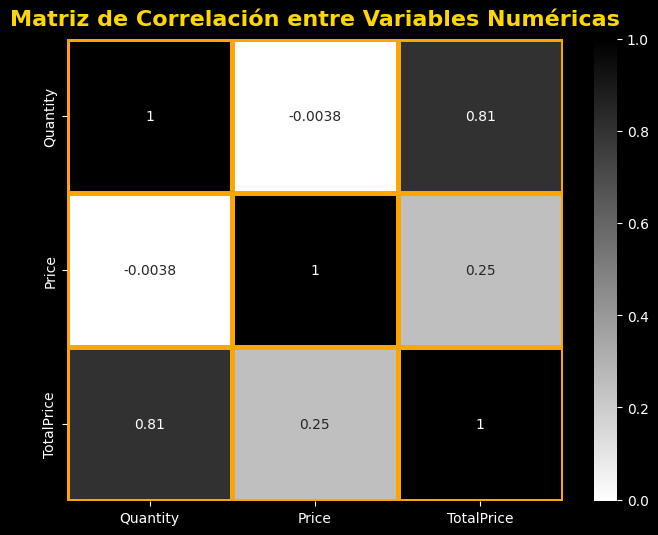

In [ ]:
plt.style.use('dark_background')

numeric_cols = ['Quantity', 'Price', 'TotalPrice']

corrs = df[numeric_cols].corr()

plt.figure(figsize=(8, 6)) 

sns.heatmap(corrs, annot=True, cmap='gray_r', linewidths=2.5, linecolor='orange')
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=16, color='gold', fontweight='bold', pad=10)

plt.tick_params(colors='white')

plt.show()

Como casi un cuarto de las filas tienen el valor de 'nan' (un string con el texto "nan") en la columna 'Customer ID' vamos a dejar estas filas en esa columna pero no vamos a considerar esa columna en nuestro gráfico de ventas por clientes ('nan' es la moda de esta columna).

In [ ]:
gasto_total_por_cliente = df.groupby('Customer ID')['TotalPrice'].sum()

gasto_total_por_cliente = round(gasto_total_por_cliente, 2)

cant_comps_por_cliente = df.groupby('Customer ID')['Invoice'].nunique()

gasto_promedio_por_cliente = gasto_total_por_cliente/cant_comps_por_cliente

gasto_promedio_por_cliente = round(gasto_promedio_por_cliente, 2)

gasto_promedio_por_cliente.describe()

,0
count,5870.00
mean,392.66
std,1216.02
min,2.95
25%,182.16
50%,285.30
75%,421.26
max,84236.25


In [ ]:
gasto_por_pais = df.groupby('Country')['TotalPrice'].sum()

gasto_por_pais = round(gasto_por_pais, 2)

cant_compras_por_pais = df.groupby('Country')['Invoice'].nunique()

gasto_promedio_por_pais = gasto_por_pais/cant_compras_por_pais

gasto_promedio_por_pais

gasto_promedio_por_pais = round(gasto_promedio_por_pais, 2)

gasto_promedio_por_pais.describe()


,0
count,43.00
mean,869.23
std,531.37
min,70.19
25%,512.75
50%,704.16
75%,1112.88
max,2420.23


In [ ]:
ventas_por_pais_producto = df.groupby(['Country', 'Description'])['Quantity'].sum().reset_index()

ventas_por_pais_producto_ordenado = ventas_por_pais_producto.sort_values(by=['Country', 'Quantity'], ascending=[True, False])

top_10_por_pais = ventas_por_pais_producto_ordenado.groupby('Country').head(10).reset_index(drop=True)

print("Top 10 productos más vendidos por país:")
for pais in top_10_por_pais['Country'].unique():
    print(f"\n--- {pais} ---")
    productos_pais = top_10_por_pais[top_10_por_pais['Country'] == pais]
    print(productos_pais[['Description', 'Quantity']])

Top 10 productos más vendidos por país:

--- Australia ---
                     Description  Quantity
0        MINI PAINT SET VINTAGE       3060
1             RABBIT NIGHT LIGHT      1884
2         RED  HARMONICA IN BOX       1728
3  RED TOADSTOOL LED NIGHT LIGHT      1668
4   HOMEMADE JAM SCENTED CANDLES      1368
5           DOLLY GIRL LUNCH BOX      1316
6            SPACEBOY LUNCH BOX       1200
7           MINI JIGSAW SPACEBOY      1008
8         MINI JIGSAW DOLLY GIRL       792
9         BLUE HARMONICA IN BOX        732

--- Austria ---
                            Description  Quantity
10     SET 12 KIDS COLOUR  CHALK STICKS       288
11                   MINI JIGSAW PURDEY       240
12       PACK OF 6 PANNETONE GIFT BOXES       144
13         PACK OF 6 SWEETIE GIFT BOXES       144
14        ASSORTED COLOUR BIRD ORNAMENT       136
15            EDWARDIAN PARASOL NATURAL       120
16                MINI HIGHLIGHTER PENS       120
17              EDWARDIAN PARASOL BLACK       108
1

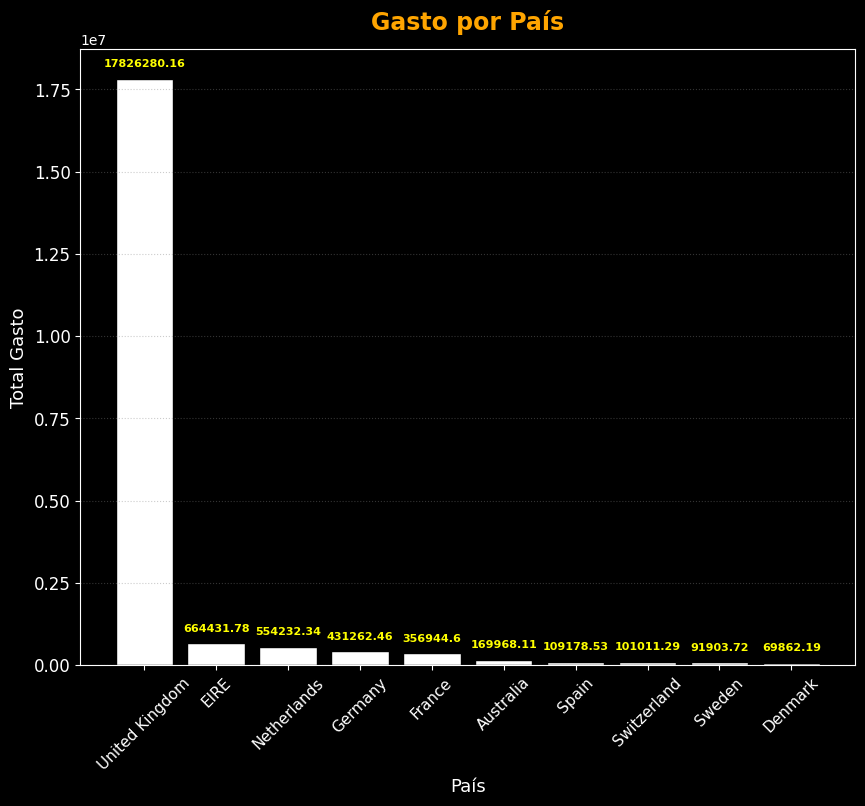

In [ ]:
gasto_por_pais = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
gasto_por_pais = round(gasto_por_pais, 2)

plt.style.use('dark_background')
plt.figure(figsize=(10, 8))
plt.bar(gasto_por_pais.index, gasto_por_pais.values, color="white", edgecolor="black")
plt.title('Gasto por País', fontsize=17, color='orange', fontweight='bold', pad=14)
plt.xlabel('País', fontsize=13, color='white')
plt.ylabel('Total Gasto', fontsize=13, color='white')
plt.tick_params(axis='x', labelrotation=45, colors='white', labelsize=11)
plt.tick_params(axis='y', colors='white', labelsize=12)
plt.grid(axis='y', color='gray', linestyle=':', alpha=0.4)
for label in plt.gca().get_xticklabels():
    label.set_ha('right')
for i, v in enumerate(gasto_por_pais.values):
    plt.text(i, v + max(gasto_por_pais.values)* 0.02, str(v), color='yellow', ha='center', fontsize=8, fontweight='bold')
plt.show()

Cómo las barras de los últimos países del top quedaron demasiado bajas, vamos a hacer el gráfico solo del puesto 2 al 10.

<ipython-input-114-50d403213ba4>:87: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # Ajustar diseño para evitar solapamiento


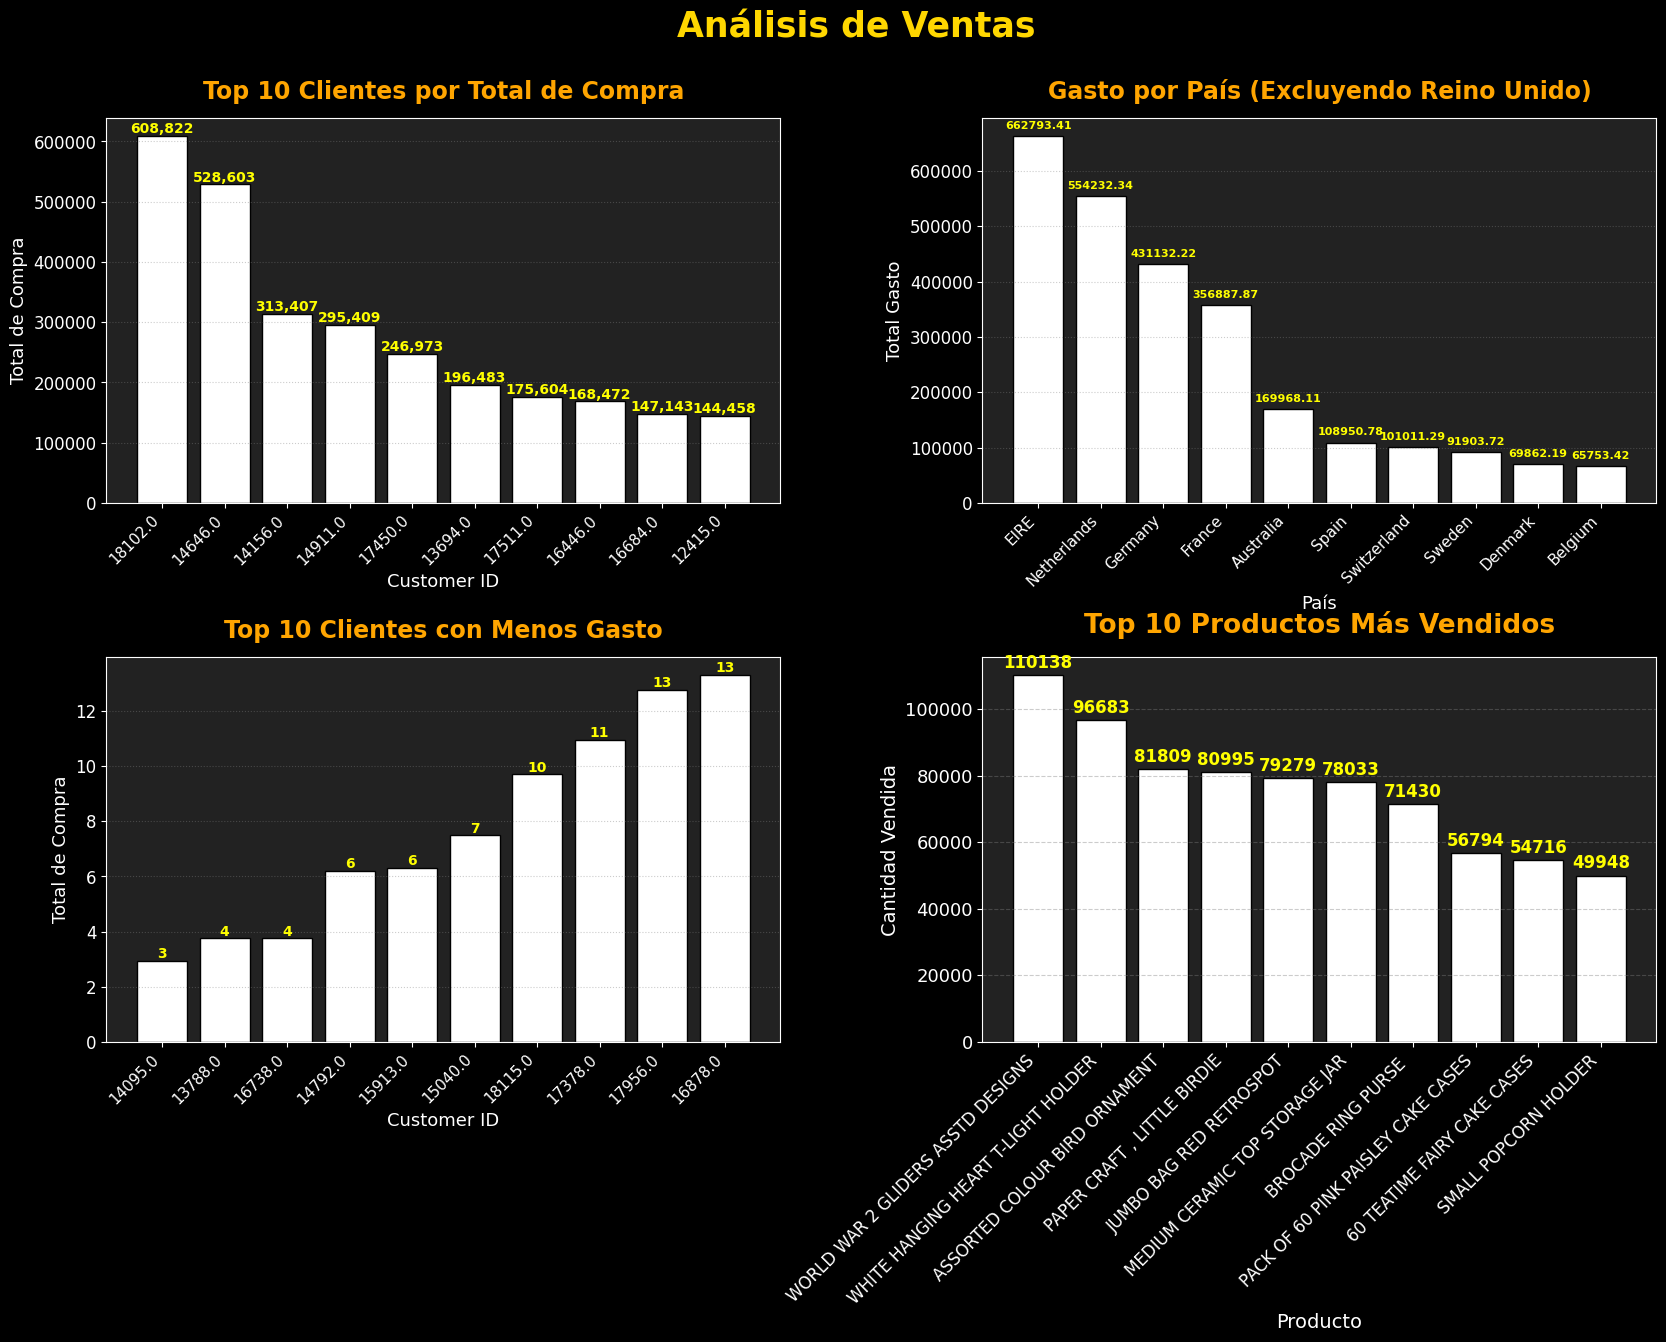

In [ ]:
plt.style.use('dark_background')

top_productos = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
ventas_mensuales = df.resample('ME', on='InvoiceDate')['TotalPrice'].sum()
top_clientes = df[df['Customer ID'] != 'nan'].groupby('Customer ID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
clientes_menos_gastos = df[(df['Customer ID'] != 'nan')].groupby('Customer ID')['TotalPrice'].sum().sort_values(ascending=True).head(10)
gasto_por_pais = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(11)
gasto_por_pais = round(gasto_por_pais, 2)

gasto_por_pais_sin_uk = gasto_por_pais.drop('United Kingdom')

fig = plt.figure(figsize=(20, 12), facecolor='black')
gs = fig.add_gridspec(2, 2, hspace=0.4, wspace=0.3)

ax0 = fig.add_subplot(gs[0, 0])
bars_top = ax0.bar(top_clientes.index, top_clientes.values, color="white", edgecolor='black')
ax0.set_title('Top 10 Clientes por Total de Compra', fontsize=17, color='orange', fontweight='bold', pad=14)
ax0.set_xlabel('Customer ID', fontsize=13, color='white')
ax0.set_ylabel('Total de Compra', fontsize=13, color='white')
ax0.tick_params(axis='x', labelrotation=45, colors='white', labelsize=11)
ax0.tick_params(axis='y', colors='white', labelsize=12)
ax0.set_facecolor('#222222')
ax0.grid(axis='y', color='gray', linestyle=':', alpha=0.4)
for label in ax0.get_xticklabels():
    label.set_ha('right')

for bar in bars_top:
    yval = bar.get_height()
    ax0.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:,.0f}', va='bottom', ha='center', color='yellow', fontsize=10, fontweight='bold')  # va: vertical alignment

ax1 = fig.add_subplot(gs[0, 1])
bars_country = ax1.bar(gasto_por_pais_sin_uk.index, gasto_por_pais_sin_uk.values, color="white", edgecolor="black")
ax1.set_title('Gasto por País (Excluyendo Reino Unido)', fontsize=17, color='orange', fontweight='bold', pad=14)
ax1.set_xlabel('País', fontsize=13, color='white')
ax1.set_ylabel('Total Gasto', fontsize=13, color='white')
ax1.tick_params(axis='x', labelrotation=45, colors='white', labelsize=11)
ax1.tick_params(axis='y', colors='white', labelsize=12)
ax1.set_facecolor('#222222')
ax1.grid(axis='y', color='gray', linestyle=':', alpha=0.4)
for label in ax1.get_xticklabels():
    label.set_ha('right')
for i, v in enumerate(gasto_por_pais_sin_uk.values):
    ax1.text(i, v + max(gasto_por_pais_sin_uk.values) * 0.02, str(v), color='yellow', ha='center', fontsize=8, fontweight='bold')

ax3 = fig.add_subplot(gs[1, 0])
bars_least = ax3.bar(clientes_menos_gastos.index, clientes_menos_gastos.values, color="white", edgecolor='black')
ax3.set_title('Top 10 Clientes con Menos Gasto', fontsize=17, color='orange', fontweight='bold', pad=14)
ax3.set_xlabel('Customer ID', fontsize=13, color='white')
ax3.set_ylabel('Total de Compra', fontsize=13, color='white')
ax3.tick_params(axis='x', labelrotation=45, colors='white', labelsize=11)
ax3.tick_params(axis='y', colors='white', labelsize=12)
ax3.set_facecolor('#222222')
ax3.grid(axis='y', color='gray', linestyle=':', alpha=0.4)
for label in ax3.get_xticklabels():
    label.set_ha('right')

for bar in bars_least:
    yval = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:,.0f}', va='bottom', ha='center', color='yellow', fontsize=10, fontweight='bold')

ax2 = fig.add_subplot(gs[1, 1])
bars = ax2.bar(top_productos.index, top_productos.values, color='white', edgecolor='black')
ax2.set_title('Top 10 Productos Más Vendidos', fontsize=19, color='orange', fontweight='bold', pad=17)
ax2.set_xlabel('Producto', fontsize=14, color='white')
ax2.set_ylabel('Cantidad Vendida', fontsize=14, color='white')
ax2.tick_params(axis='x', labelrotation=45, colors='white', labelsize=12)
ax2.tick_params(axis='y', colors='white', labelsize=13)
ax2.grid(axis='y', color='gray', linestyle='--', alpha=0.4)
ax2.set_facecolor('#222222')
for label in ax2.get_xticklabels():
    label.set_ha('right')
for i, v in enumerate(top_productos.values):
    ax2.text(i, v + max(top_productos.values) * 0.02, str(v), color='yellow', ha='center', fontsize=12, fontweight='bold')

fig.suptitle('Análisis de Ventas', fontsize=25, color='gold', fontweight='bold', y=0.97)

plt.tight_layout() 
plt.show()

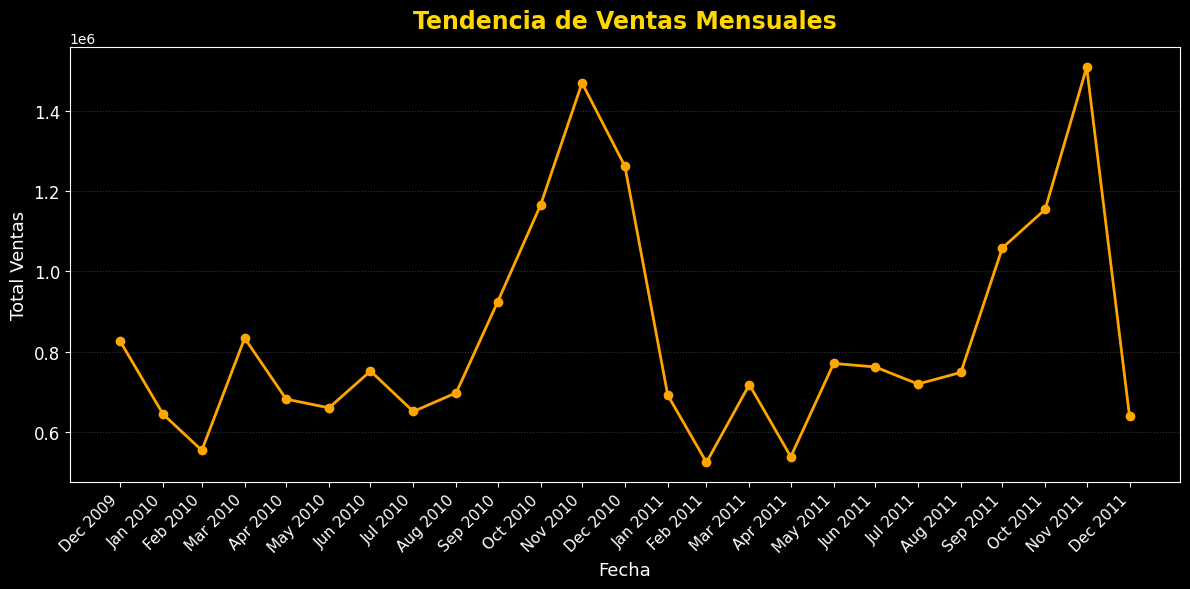

In [ ]:
ventas_mensuales = df.resample('ME', on='InvoiceDate')['TotalPrice'].sum()
top_clientes = df[df['Customer ID'] != 'nan'].groupby('Customer ID')['TotalPrice'].sum().sort_values(ascending = False).head(10)

import matplotlib.pyplot as plt

plt.style.use('dark_background')

ventas_mensuales = df.resample('ME', on='InvoiceDate')['TotalPrice'].sum()

plt.figure(figsize=(12, 6)) 

plt.plot(ventas_mensuales.index, ventas_mensuales.values, marker='o', linestyle='-', color='orange', linewidth=2) 

plt.title('Tendencia de Ventas Mensuales', fontsize=17, color='gold', fontweight='bold', pad=14)
plt.xlabel('Fecha', fontsize=13, color='white')
plt.ylabel('Total Ventas', fontsize=13, color='white')
plt.tick_params(axis='x', labelrotation=45, colors='white', labelsize=11)
plt.tick_params(axis='y', colors='white', labelsize=12)
plt.grid(axis='y', color='gray', linestyle=':', alpha=0.4)
plt.xticks(ventas_mensuales.index) 
plt.gca().set_xticklabels([d.strftime('%b %Y') for d in ventas_mensuales.index], rotation=45, ha='right')
plt.tight_layout() 

plt.show()

### Conclusiones:
Los productos más vendidos ordenados de forma descendente son: 1) WORLD WAR 2 GLIDERS ASSTD DESIGNS, 2) WHITE HANGING HEART T-LIGHT HOLDER, 3) PAPER CRAFT, LITTLER BIRDIE, 4) ASSORTED COLOUR BIRD ORNAMENT, 5) MEDIUM CERAMIC TOP STORAGE JAR, 6) JUMBO BAG RED RETROSPOT, 7) BROCADE RING PURSE, 8) PACK OF 60 PINK PAISLEY CASE CASES, 9) 60 TEATIME FAIRY CAKE CASES, 10) PACK OF 62 RETROSPOT CAKE CASES.

Los meses con más ventas fueron octubre, noviembre y diciembre tanto de 2010 como de 2011.

Los Customer ID's de los clientes que gastaron más dinero en compras a nuestra empresa ordenados de forma descendente son: 1) 18102, 2) 14646, 3) 14156, 4) 14911, 5) 17450, 6) 13694, 7) 17511, 8) 16446, 9) 16684, 10) 12415.

Los Customers ID's de los clientes que gastaron menos dinero en compras a nuestra empresa ordenados de menor a mayor gasto son: 1) 14095, 2) 16738, 3) 13788, 4) 14792, 5) 15913, 6) 15040, 7) 18115, 8) 17378, 9) 17956, 10) 16878.

Los países que más gastaron ordenados de mayor a menor gasto son: 1) Reino Unido, 2) Irlanda, 3) Países Bajos, 4) Alemania, 5) Francia, 6) Australia, 7) España, 8) Suiza, 9) Suecia, 10) Dinamarca.



